In [1]:
import tensorflow as tf

In [2]:
a = tf.random.uniform(shape=(100, 100, 2), minval=0, maxval=1)
b = tf.cast(tf.random.uniform(shape=(100, 100, 1), minval=0, maxval=1.2), tf.int32)

In [3]:
import matplotlib.pyplot as plt
import sys
from functools import partial

In [4]:
sys.path.append('../utils/')

In [5]:
from focal_tversky_loss import *

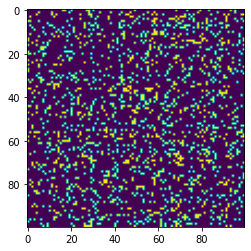

In [6]:
plt.imshow(b)

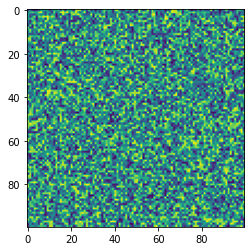

In [7]:
plt.imshow(a[:, :, 1])

In [8]:
funcs = {
    'mean_iou': mean_iou_loss,
    'reduced_iou': reduced_iou_loss,
    'weighted_ce': partial(weighted_ce_loss, pos_weight=1.5),
    'ce': weighted_ce_loss
}

In [9]:
for name, func in funcs.items():
    print(f'{name}\t{func(b, b)}\t{func(b, 1-b)}\t{func(b, a)}')

mean_iou	0.0	1.0	0.8999643325805664
reduced_iou	0.00029736757278442383	1.0	0.7566754817962646
weighted_ce	6556.1806640625	12672.794921875	9420.572265625
ce	6292.88427734375	12090.205078125	9007.7373046875


In [8]:
mean_iou_loss(b, a)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8999522>

In [9]:
reduced_iou_loss(b, a)

<tf.Tensor: shape=(), dtype=float32, numpy=0.75558054>

In [10]:
mean_iou_loss(b, 1-b)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [11]:
reduced_iou_loss(b, 1-b)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [12]:
mean_iou_loss(b, b)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [13]:
reduced_iou_loss(b, b)

<tf.Tensor: shape=(), dtype=float32, numpy=0.00030702353>

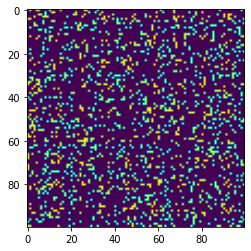

In [14]:
plt.imshow(b2)

In [15]:
b1, b2 = tf.keras.backend.flatten(b1), tf.keras.backend.flatten(b2)

In [20]:
iou = 2 * b1 * b2 * tf.math.reciprocal(b1 + b2)

In [18]:
iou = tf.where(tf.math.is_nan(iou), tf.zeros_like(iou), iou)

In [25]:
iou[~tf.math.is_nan(iou)]

<tf.Tensor: shape=(1608,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)>

In [11]:
onhot = tf.one_hot(tf.gather(b, indices=0, axis=-1), depth=2)

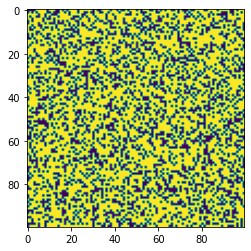

In [33]:
plt.imshow(onhot[:, :, 0])

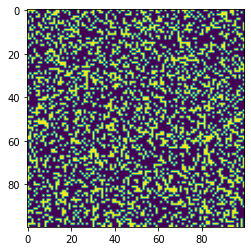

In [34]:
plt.imshow(onhot[:, :, 1])